# GRIP:  @ The sparks foundation 
    

# Data Science & Business Analytics Internship

# Author: Shashikant suresh sawadh

# Task 01 : Predicton using supervise Machine Learning _Simple linear regration

In this task we will 
predict the Percentage Scores of a student based on the number of hours studied,
What will be predicted scoore if a student study fo a 9.25 hrs/day

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset from link
url = 'http://bit.ly/w-data'
student_data = pd.read_csv(url)

In [3]:
student_data.head

<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [4]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
student_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Exploratory data analysis

Discover and visualize the data to gain insights

In [6]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


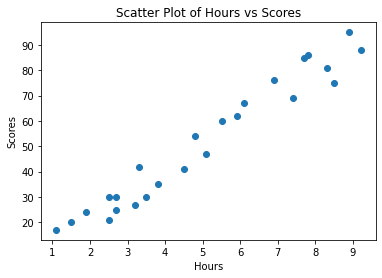

In [8]:
plt.scatter(x= student_data.Hours, y =student_data.Scores)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scatter Plot of Hours vs Scores")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Prepare the data for Machine Learning algorithms

# Data Cleaning

In [9]:
# using iloc function we will divide the data 
x = student_data.iloc[:, :1].values  
y = student_data.iloc[:, 1:].values

In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [12]:
x=student_data.drop('Scores', axis='columns')
y=student_data.drop('Hours', axis='columns')
print('shape of x',x.shape)
print('shape of y',y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1)
print('shape of x_train', x_train.shape)
print('shape of x_test', x_test.shape)
print('shape of y_train', y_train.shape)
print('shape of y_test', y_test.shape)

shape of x_train (20, 1)
shape of x_test (5, 1)
shape of y_train (20, 1)
shape of y_test (5, 1)


# Select a model and train it

In [14]:
# y = m * x + c
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
lr=regressor
print("Training complete.")

Training complete.


In [15]:
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
lr.coef_

array([[10.46110829]])

In [17]:
lr.intercept_

array([-1.53695733])

In [18]:
m = 3.93
c = 50.44
y  = m * 4 + c 
y

66.16

In [19]:
lr.predict([[4]])[0][0].round(2)

40.31

In [20]:
y_pred  = lr.predict(x_test)
y_pred

array([[ 9.97026179],
       [32.98470004],
       [18.33914843],
       [87.38246316],
       [48.67636248]])

In [21]:
df=pd.DataFrame(np.c_[x_test, y_test, y_pred], columns = ["hours", "Scores_original","Scores_predicted"])

In [22]:
df.head()

,hours,Scores_original,Scores_predicted
0,1.1,17.0,9.970262
1,3.3,42.0,32.984700
2,1.9,24.0,18.339148
3,8.5,75.0,87.382463
4,4.8,54.0,48.676362


# Fine-tune your model

In [23]:
lr.score(x_test,y_test)

0.8421031525243527

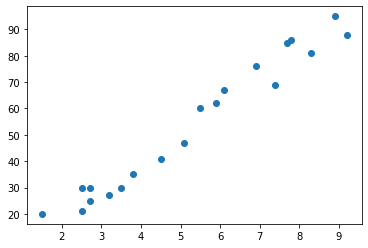

In [24]:
plt.scatter(x_train,y_train)

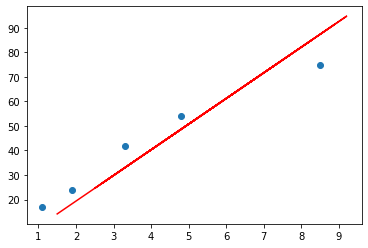

In [25]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = "r")

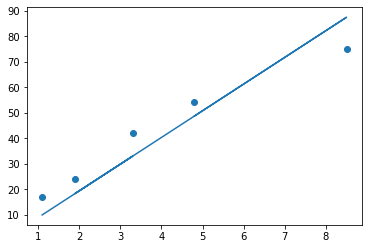

In [26]:
# Plotting the regression line
line = lr.coef_*x_test+lr.intercept_

# Plotting for the test data
plt.scatter(x_test, y_test)
plt.plot(x_test, line);
plt.show()

# Predicte the scoore if a student study for a 9.25 hrs/day

In [27]:
# You can also test with your own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [95.22829438]


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [28]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 7.882398086270432
